In [1]:
import pandas as pd
import numpy as np
import glob
import re
import pickle
import seaborn as sns

import string
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix

%matplotlib inline

In [2]:
data_path = '../../Dataset/jakartaresearch'

In [3]:
files = glob.glob(data_path + '/indonesian-sentiment/*')

In [4]:
files

['../../Dataset/jakartaresearch/indonesian-sentiment/testing.res',
 '../../Dataset/jakartaresearch/indonesian-sentiment/training.res']

In [5]:
train = pickle.load(open(files[1], 'rb'))
test = pickle.load(open(files[0], 'rb'))

In [6]:
d_train = pd.DataFrame(data={'content': train[0], 'label': train[1]})
d_test = pd.DataFrame(data={'content': test[0], 'label': test[1]})

In [7]:
d_train['label_num'] = d_train.label.apply(lambda x: int(re.sub('Rated | stars out of five stars', '', x)))

In [8]:
d_train = d_train[d_train['label_num'] != 3]

In [9]:
d_test['label_num'] = d_test.label.apply(lambda x: int(re.sub('Rated | stars out of five stars', '', x)))

In [10]:
d_test = d_test[d_test['label_num'] != 3]

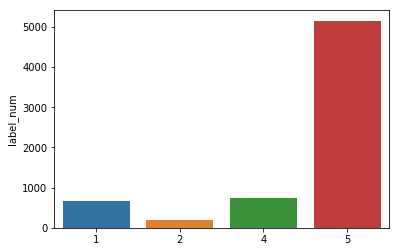

In [11]:
plot = sns.barplot(y = d_train.label_num.value_counts(), x = d_train.label_num.value_counts().index)
plot.get_figure().savefig('train_dist.png')

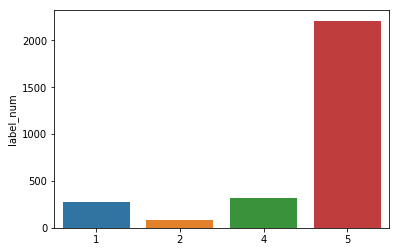

In [12]:
plot = sns.barplot(y = d_test.label_num.value_counts(), x = d_test.label_num.value_counts().index)
plot.get_figure().savefig('test_dist.png')

In [13]:
d_train.loc[d_train.label_num > 3, 'sentiment'] = 1
d_train.loc[d_train.label_num < 3, 'sentiment'] = 0

In [14]:
d_test.loc[d_test.label_num > 3, 'sentiment'] = 1
d_test.loc[d_test.label_num < 3, 'sentiment'] = 0

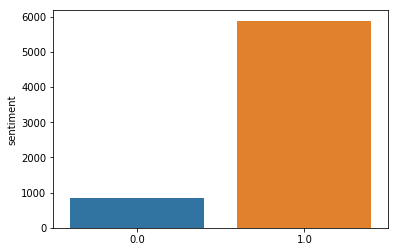

In [15]:
plot = sns.barplot(y = d_train.sentiment.value_counts(), x = d_train.sentiment.value_counts().index)
plot.get_figure().savefig('train_sentiment_dist.png')

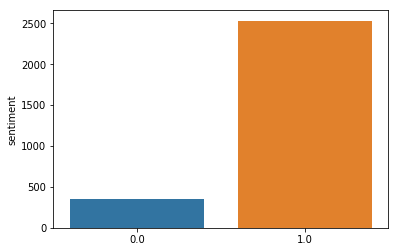

In [16]:
plot = sns.barplot(y = d_test.sentiment.value_counts(), x = d_test.sentiment.value_counts().index)
plot.get_figure().savefig('test_sentiment_dist.png')

In [17]:
d_train.shape

(6747, 4)

In [18]:
d_test.shape

(2886, 4)

## Cleansing

In [19]:
def cleansing(text):
    word_list = word_tokenize(text)
    word_list = [word for word in word_list if len(word) > 2 and word.isalnum()]
    word_list = [word for word in word_list if string.punctuation not in word]
    text = ' '.join(word_list)
    
    return text

In [20]:
d_train['content_cleansing'] = d_train.content.apply(cleansing)

In [21]:
d_test['content_cleansing'] = d_test.content.apply(cleansing)

## Feature Extraction

In [22]:
cv = CountVectorizer()

In [23]:
X_train = cv.fit_transform(d_train.content_cleansing)

In [24]:
X_test = cv.transform(d_test.content_cleansing)

## Model

In [25]:
mnb = MultinomialNB()

In [26]:
mnb.fit(X_train, d_train.sentiment)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [27]:
y_pred = mnb.predict(X_test)

In [28]:
y_pred= y_pred.astype(np.int16)

## Evaluation

In [29]:
f1_score(d_test.sentiment.astype(np.int16), y_pred)

0.9621857058008315

In [30]:
precision_score(d_test.sentiment, y_pred)

0.9646685192536721

In [31]:
recall_score(d_test.sentiment, y_pred)

0.9597156398104265

In [32]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int16)

In [33]:
confusion_matrix(d_test.sentiment, y_pred, labels = [0,1])

array([[ 265,   89],
       [ 102, 2430]])

In [34]:
d_test.sentiment.value_counts()

1.0    2532
0.0     354
Name: sentiment, dtype: int64